In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import os
import json
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/'멀티캠퍼스 5조'/2.데이터

df = pd.read_csv('통합데이터_표준화.csv')
df.head(3)

/content/drive/.shortcut-targets-by-id/1Mz49-WiynxJxHmmXYuWSqduV3-jd-BC7/멀티캠퍼스 5조/2.데이터


,출발지구군,출발지상세,예정일시,승차일시,시간대_30분,요일,월,화,수,목,금,토,일,언급량,강수량,적설량,평균속도,운행차량수,대기시간,대기시간_초
0,강북구,송천동,2019-01-01 05:20:00,2019-01-01 05:38:53,10,1,0,1,0,0,0,0,0,0.059708,0.0,0.0,0.862338,0.000000,18.0,1133.0
1,은평구,역촌동,2019-01-01 07:00:00,2019-01-01 07:35:42,14,1,0,1,0,0,0,0,0,0.522985,0.0,0.0,0.967965,0.275439,35.0,2142.0
2,도봉구,창제3동,2019-01-01 07:00:00,2019-01-01 07:30:04,14,1,0,1,0,0,0,0,0,0.585398,0.0,0.0,0.890909,0.275439,30.0,1804.0


In [ ]:
df['예정일시'] = pd.to_datetime(df['예정일시'])

In [ ]:
# 년도 추가 
add_lst = []
for i in tqdm(df.index):
    add_lst.append(df.loc[i,'예정일시'].year)

In [ ]:
df.insert(4,'year',add_lst)

In [ ]:
# 월 추가 
add_lst = []
for i in tqdm(df.index):
    add_lst.append(df.loc[i,'예정일시'].month)
df.insert(5,'month',add_lst)

100%|██████████| 3012638/3012638 [01:23<00:00, 35874.99it/s]


In [ ]:
df.head(3)

,출발지구군,출발지상세,예정일시,승차일시,year,month,시간대_30분,요일,월,화,...,금,토,일,언급량,강수량,적설량,평균속도,운행차량수,대기시간,대기시간_초
0,강북구,송천동,2019-01-01 05:20:00,2019-01-01 05:38:53,2019,1,10,1,0,1,...,0,0,0,0.059708,0.0,0.0,0.862338,0.000000,18.0,1133.0
1,은평구,역촌동,2019-01-01 07:00:00,2019-01-01 07:35:42,2019,1,14,1,0,1,...,0,0,0,0.522985,0.0,0.0,0.967965,0.275439,35.0,2142.0
2,도봉구,창제3동,2019-01-01 07:00:00,2019-01-01 07:30:04,2019,1,14,1,0,1,...,0,0,0,0.585398,0.0,0.0,0.890909,0.275439,30.0,1804.0


In [ ]:
df['대기시간'].describe()

count    3.012638e+06
mean     3.750841e+01
std      2.166873e+01
min      0.000000e+00
25%      2.100000e+01
50%      3.200000e+01
75%      4.900000e+01
max      1.020000e+02
Name: 대기시간, dtype: float64

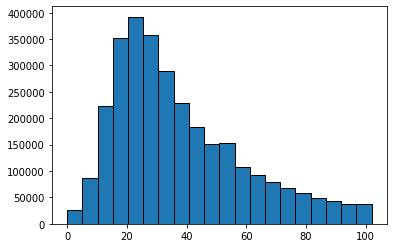

In [ ]:
plt.hist(df['대기시간'], bins = 20, edgecolor='k')
plt.show()

#### 10분 단위로 끊기

In [ ]:
bins = list(range(0, 115, 10))
bins_label = [str(x)+'분-'+str(x+10)+"분" for x in bins]
bins_label

['0분-10분',
 '10분-20분',
 '20분-30분',
 '30분-40분',
 '40분-50분',
 '50분-60분',
 '60분-70분',
 '70분-80분',
 '80분-90분',
 '90분-100분',
 '100분-110분',
 '110분-120분']

In [ ]:
df["Min"] = pd.cut(df["대기시간"], bins, right=False, labels=bins_label[:-1])
df.head(3)

,출발지구군,출발지상세,예정일시,승차일시,year,month,시간대_30분,요일,월,화,...,토,일,언급량,강수량,적설량,평균속도,운행차량수,대기시간,대기시간_초,Min
0,강북구,송천동,2019-01-01 05:20:00,2019-01-01 05:38:53,2019,1,10,1,0,1,...,0,0,0.059708,0.0,0.0,0.862338,0.000000,18.0,1133.0,10분-20분
1,은평구,역촌동,2019-01-01 07:00:00,2019-01-01 07:35:42,2019,1,14,1,0,1,...,0,0,0.522985,0.0,0.0,0.967965,0.275439,35.0,2142.0,30분-40분
2,도봉구,창제3동,2019-01-01 07:00:00,2019-01-01 07:30:04,2019,1,14,1,0,1,...,0,0,0.585398,0.0,0.0,0.890909,0.275439,30.0,1804.0,30분-40분


In [ ]:
# 대기시간 분류 저장
df.to_csv('통합데이터_대기시간분류.csv', index = False)

In [ ]:
cluster_label = list(range(0,11))
df["cluster"] = pd.cut(df["대기시간"], bins, right=False, labels=cluster_label[:-1])
df.head(3)

,출발지구군,출발지상세,예정일시,승차일시,시간대_30분,요일,월,화,수,목,...,일,언급량,강수량,적설량,평균속도,운행차량수,대기시간,대기시간_초,Min,cluster
0,강북구,송천동,2019-01-01 05:20:00,2019-01-01 05:38:53,10,1,0,1,0,0,...,0,0.059708,0.0,0.0,0.862338,0.000000,18.0,1133.0,10분-20분,1
1,은평구,역촌동,2019-01-01 07:00:00,2019-01-01 07:35:42,14,1,0,1,0,0,...,0,0.522985,0.0,0.0,0.967965,0.275439,35.0,2142.0,30분-40분,3
2,도봉구,창제3동,2019-01-01 07:00:00,2019-01-01 07:30:04,14,1,0,1,0,0,...,0,0.585398,0.0,0.0,0.890909,0.275439,30.0,1804.0,30분-40분,3


In [ ]:
df.columns

Index(['출발지구군', '출발지상세', '예정일시', '승차일시', '시간대_30분', '요일', '월', '화', '수', '목',
       '금', '토', '일', '언급량', '강수량', '적설량', '평균속도', '운행차량수', '대기시간', '대기시간_초',
       'Min', 'cluster'],
      dtype='object')

In [ ]:
temp = df[['시간대_30분', '요일', '월', '화', '수', '목',
       '금', '토', '일', '언급량', '강수량', '적설량', '평균속도', '운행차량수', 'cluster']]

In [ ]:
temp2 = df[['시간대_30분', '요일', '월', '화', '수', '목',
       '금', '토', '일', '언급량', '강수량', '적설량', '평균속도', '운행차량수']]

## 군집분석(그냥 해봤는데 별로네요)

In [ ]:
pca = PCA(n_components=2)
temp2_pca = pca.fit_transform(temp2)

In [ ]:
kmeans = KMeans(n_clusters=11, random_state = 2022)  # iris species 수
kmeans.fit(temp2)

KMeans(n_clusters=11, random_state=2022)

In [ ]:
np.unique(kmeans.labels_, return_counts = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32),
 array([335040, 392270, 312208, 101301, 250608, 290722, 193313, 368938,
        225108, 265490, 277640]))

In [ ]:
clu_df = pd.DataFrame({
    'pc1':temp2_pca[:, 0],'pc2':temp2_pca[:,1], 'target' : temp['cluster'],
    'cluster' : kmeans.labels_
})
clu_df.tail()

,pc1,pc2,target,cluster
3012633,-20.410978,-2.685549,4,3
3012634,-21.409074,-2.694260,4,3
3012635,-22.409179,-2.706958,0,3
3012636,-22.420108,-1.668190,2,3
3012637,-22.421426,-1.670780,1,3


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


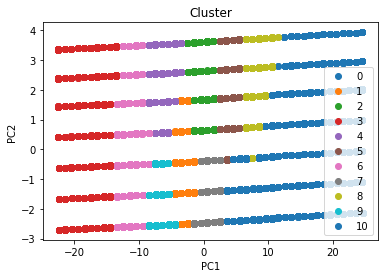

In [ ]:
for i in range(11):
    gr_df = clu_df.groupby('cluster').get_group(i)
    plt.scatter(gr_df.pc1,gr_df.pc2, label = i)

plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.title('Cluster')
plt.show()

## 분류

In [ ]:
df  = pd.read_csv('통합데이터_대기시간분류.csv')
df2 = df[['year','month','시간대_30분', '요일', '월', '화', '수', '목',
       '금', '토', '일', '언급량', '강수량', '적설량', '평균속도', '운행차량수', 'Min']]

In [ ]:
df2.head(2)

,year,month,시간대_30분,요일,월,화,수,목,금,토,일,언급량,강수량,적설량,평균속도,운행차량수,Min
0,2019,1,10,1,0,1,0,0,0,0,0,0.059708,0.0,0.0,0.862338,0.000000,10분-20분
1,2019,1,14,1,0,1,0,0,0,0,0,0.522985,0.0,0.0,0.967965,0.275439,30분-40분


In [ ]:
temp224 = df2[(df2.year == 2022) & (df2.month == 4)].reset_index(drop = True)
temp224.head(3)
[2, 0.010059, 1, 0, ]

,year,month,시간대_30분,요일,월,화,수,목,금,토,일,언급량,강수량,적설량,평균속도,운행차량수,Min
0,2022,4,0,4,0,0,0,0,1,0,0,0.012439,0.0,0.0,0.732468,0.021053,30분-40분
1,2022,4,0,4,0,0,0,0,1,0,0,0.007355,0.0,0.0,0.884848,0.021053,0분-10분
2,2022,4,2,4,0,0,0,0,1,0,0,0.010059,0.0,0.0,0.803463,0.021053,20분-30분


In [ ]:
X = np.array(temp224[['시간대_30분', '요일', '월', '화', '수', '목',
       '금', '토', '일','언급량', '강수량', '적설량', '평균속도', '운행차량수']])
y = np.array(temp224['Min'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size= 0.1, random_state=2022
)

### 의사결정나무

In [ ]:
dtc = DecisionTreeClassifier(random_state = 2022)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

In [ ]:
dtc.score(X_test, y_test)

0.24447879858657243

In [ ]:
dtc2 = DecisionTreeClassifier(random_state = 1122, max_depth = 3)
dtc2.fit(X_train, y_train)
dtc2.score(X_test, y_test)

0.24922703180212014

### 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state =2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.254416961130742

In [ ]:
params = {
    'max_depth' : [2, 4, 6, 8],
    'min_samples_split' : [2, 4, 6]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(rfc, params, scoring = 'accuracy', cv = 5)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2022),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6]},
             scoring='accuracy')

In [ ]:
grid_rf.best_params_

{'max_depth': 8, 'min_samples_split': 4}

In [ ]:
params = {
    'max_depth' : [8, 10, 12],
    'min_samples_split' : [3, 4, 5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_rf2 = GridSearchCV(rfc, params, scoring = 'accuracy', cv = 3)
grid_rf2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2022),
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_split': [3, 4, 5]},
             scoring='accuracy')

In [ ]:
print(grid_rf2.best_params_)
grid_rf2.score(X_test, y_test)

{'max_depth': 12, 'min_samples_split': 5}


0.2770538869257951

### SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC(random_state= 2022)

params = {'C' : [0.01, 0.1, 1, 10, 100]}
grid_sv = GridSearchCV(svc, params, scoring = 'accuracy', cv = 3)
grid_sv.fit(X_train, y_train)
grid_sv.best_params_

KeyboardInterrupt: ignored

In [ ]:
params = {'C' : [5, 10, 30, 50]}
grid_sv = GridSearchCV(svc, params, scoring = 'accuracy', cv = 5)
grid_sv.fit(X_train, y_train)
grid_sv.best_params_

### XGB Classifier

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 2022)
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
accuracy_score(y_test, pred_xgb)

0.26501766784452296

In [ ]:
params = {'max_depth' : [3,4,5,6]}
grid_xgb = GridSearchCV(xgb, params, scoring = 'accuracy', cv = 3)
grid_xgb.fit(X_train, y_train)
grid_xgb.best_params_

{'max_depth': 6}

In [ ]:
grid_xgb.best_estimator_.score(X_test, y_test)

0.2732994699646643

### 로지스틱회귀 다중분류

In [ ]:
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)

In [ ]:
# 랜포
# decision tree
# SVM
# XGboost